<a href="https://colab.research.google.com/github/pra961/MAT421/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The goal of this project is to build a logistic regression model to predict which house in a pair of houses is more expensive given information such as longitude, latitude, rooms, and bedrooms.

Currently, people need access to real estate agents and appraisers experts to value their house. A model like this one can help save people time and money.

# Related Work

This has been tried before on an Australian dataset: https://ieeexplore.ieee.org/document/9673533

They got accuracy between 85% and 100%, but they factored in distance between different neighborhoods. The data was, however, split into categories and predicted rather than being compared one-to-one, as will be done here.

In this paper: https://dl.acm.org/doi/10.1145/3537693.3537732, rental price prediction didn't reach a desriable outcome, however, linear regression was used instead of logistic regression.

# Main Method

The method for this project is logistic regression. It is used to predict the results of a 0/1 variable (binomial logistic regression). The process is first linear regression, then a sigmoid is applied on top of it.

Linear regression works by creating a line of best fit using the variables in the input.

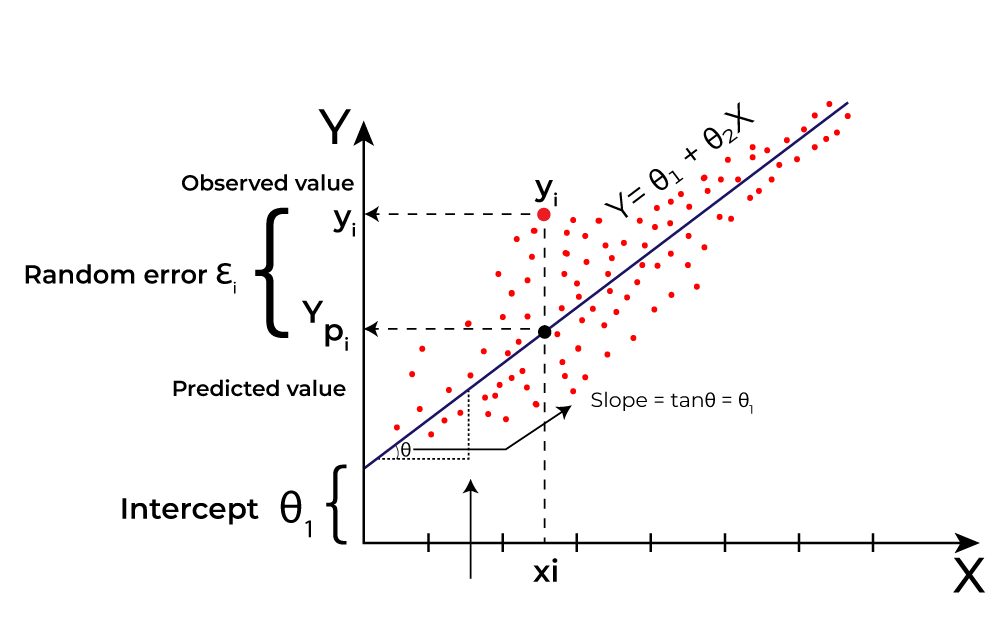

The equation for multiple linear regression is:
y
=
β
0
+
β
1
X
1
+
β
2
X
2
+
…
…
…
β
n
X
n
y=β
0
​
 +β
1
​
 X1+β
2
​
 X2+………β
n
​
 Xn
where:

Y is the dependent variable;
X1, X2, …, Xn are the independent variables;
β0 is the intercept;
β1, β2, …, βn are the slopes

This is the equation for the gradient descent portion, where the values are updated:

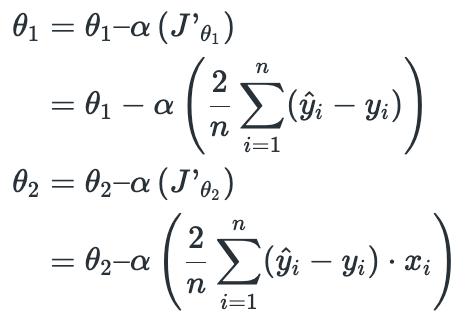

A sigmoid function is the applied to make the resulting values between 0 and 1.

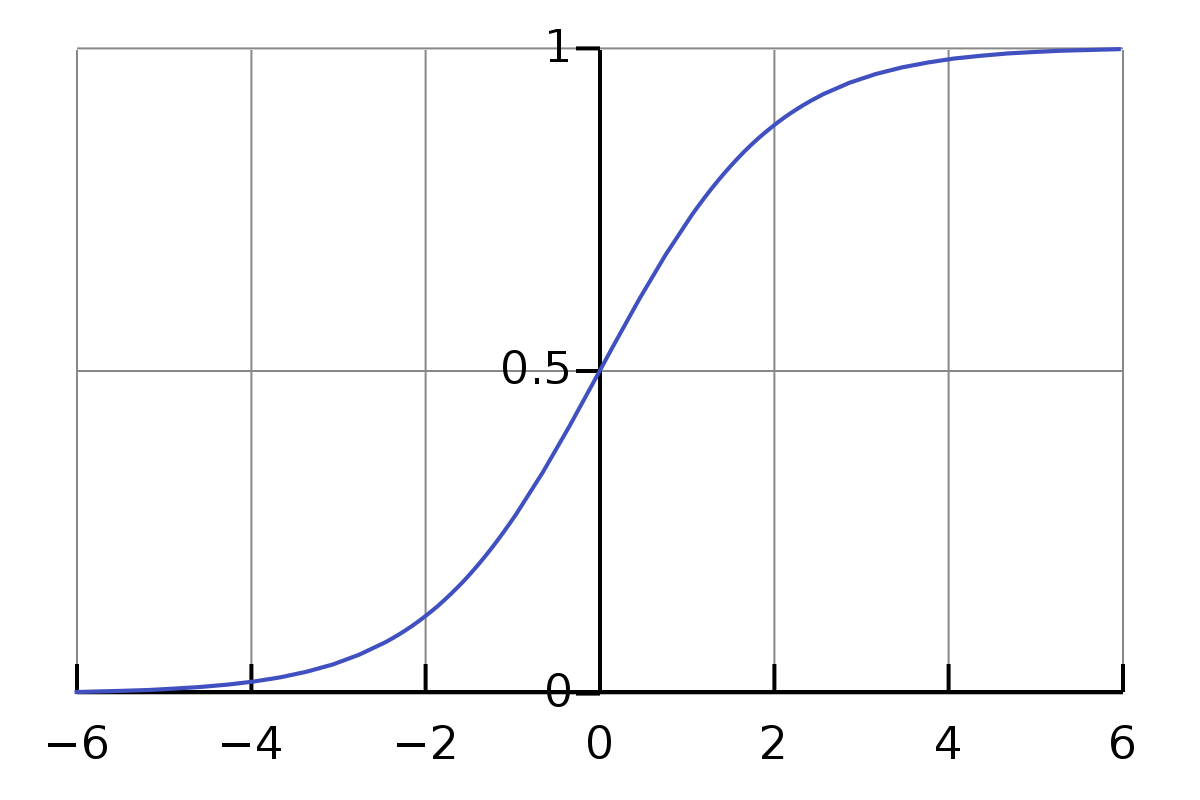

# Dataset

This is the link to the dataset: https://www.kaggle.com/datasets/camnugent/california-housing-prices. It is a list of house prices and house information based on the 1990 California Census.

# Implementation

First, I load the data in using pandas and drop any NA values as those won't convert to numbers in a model. I then display the first five rows.

In [71]:
import pandas as pd

df = pd.read_csv('housing.csv')
df.dropna(inplace=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [72]:
df.shape

(20433, 10)

We can see that there are 20433 rows and 10 columns.

In [73]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

We can see the names of all the columns, including total rooms and ocean proximity.

In [74]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


This is the statistical description of each of the columns. We can see that values are all over the place, so they need to be normalized so that a model can run on them.

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[df.select_dtypes(include=['float64']).columns])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819,NEAR BAY
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626,NEAR BAY
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183,NEAR BAY
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622,NEAR BAY
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418,NEAR BAY


We can now see that the values are normalized. All the values are now close to each other, except for the column 'ocean_proximity', which contains words and needs to be changed.

In [76]:
df = pd.get_dummies(df, columns=['ocean_proximity'])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819,False,False,False,True,False
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626,False,False,False,True,False
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183,False,False,False,True,False
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622,False,False,False,True,False
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418,False,False,False,True,False


The column 'ocean_proximity' was split into multiple columns depending on their value so each individual cell is either 0 or 1. This makes it possible for a model to be created.

In [77]:
df = df.astype({col: int for col in df.select_dtypes('bool').columns})
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327314  1.051717            0.982163    -0.803813       -0.970325   
1  -1.322323  1.042355           -0.606210     2.042130        1.348276   
2  -1.332305  1.037674            1.855769    -0.535189       -0.825561   
3  -1.337296  1.037674            1.855769    -0.623510       -0.718768   
4  -1.337296  1.037674            1.855769    -0.461970       -0.611974   

   population  households  median_income  median_house_value  \
0   -0.973320   -0.976833       2.345163            2.128819   
1    0.861339    1.670373       2.332632            1.313626   
2   -0.819769   -0.843427       1.782939            1.258183   
3   -0.765056   -0.733562       0.932970            1.164622   
4   -0.758879   -0.628930      -0.013143            1.172418   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                          0                       0                       0   
1   

The values of True and False are converted to 1 and 0, respectively.

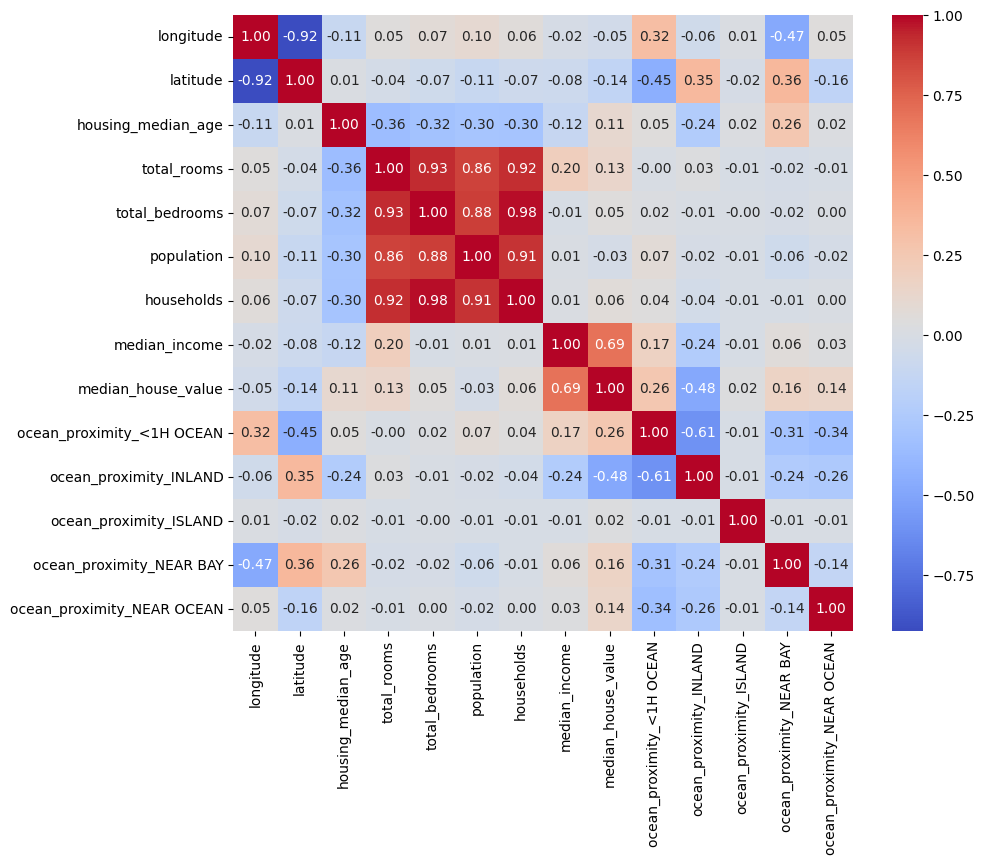

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

This is the correlation matrix between the variables. It shows how well one variable's changes correlate with another's. We can see that the columns 'total_rooms', 'total_bedrooms', 'population', and 'households' all closely correlate to each other.

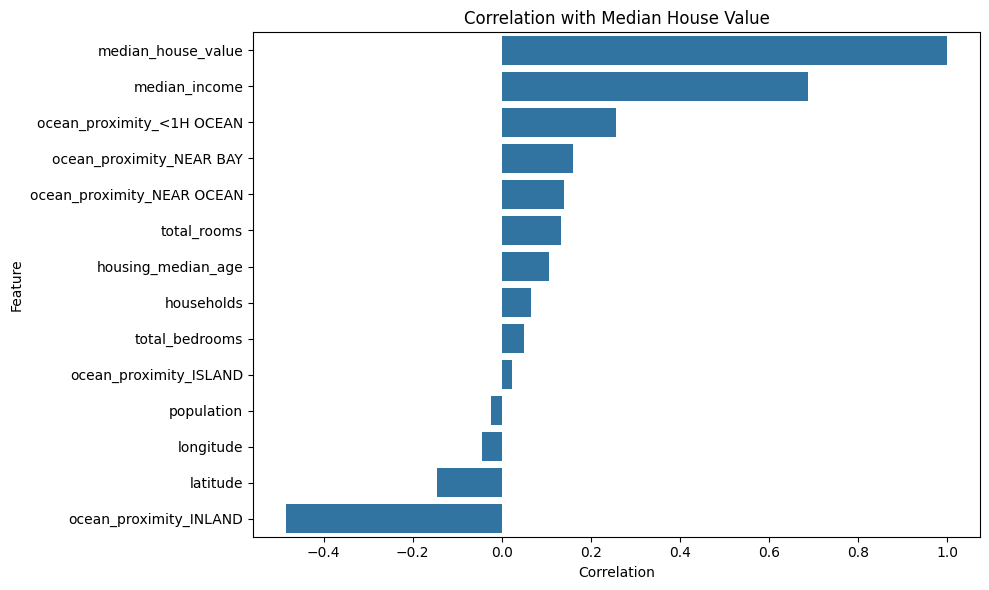

In [79]:
correlation = df.corr()['median_house_value'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.values, y=correlation.index)
plt.title('Correlation with Median House Value')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

This is what we are interested in, the correlation with the median house value. We can see that median income most closely correlates with house value and ocean proximity inland least closely correlates with it.

In [80]:
y = df['median_house_value']
X = df.drop('median_house_value', axis=1)
y.head()

,median_house_value
0,2.128819
1,1.313626
2,1.258183
3,1.164622
4,1.172418


The dataset is now split into X and y, with y containing the median house value and X containing the rest of the values.

In [81]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,0,0,0,1,0
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,0,0,0,1,0
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,0,0,0,1,0
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,0,0,0,1,0
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,0,0,0,1,0


This is the first 5 rows of X.

In [82]:
import numpy as np

indices = np.random.randint(0, len(X), size=(10000, 2))

X1 = X.iloc[indices[:, 0]].reset_index(drop=True)
X2 = X.iloc[indices[:, 1]].reset_index(drop=True)
y1 = y.iloc[indices[:, 0]].reset_index(drop=True)
y2 = y.iloc[indices[:, 1]].reset_index(drop=True)

X_pairs = X1 - X2
y_pairs = (y1 > y2).astype(int)

X_pairs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,1.267763,-1.633669,-1.906048,1.112476,0.336992,0.079422,0.290356,4.272488,1,-1,0,0,0
1,-0.004991,0.046810,0.079419,-0.523518,-0.873332,-1.173687,-0.967852,-0.399685,0,0,0,0,0
2,-0.923371,1.413662,1.429536,-0.225149,-0.261050,-0.431529,-0.227576,-0.297171,-1,1,0,0,0
3,1.167939,-0.505548,0.555931,-0.765142,-0.678731,-0.109426,-1.150959,-0.703595,-1,1,0,0,0
4,1.572226,-1.914529,-1.508955,0.410943,0.745180,0.826876,0.813519,-0.310966,1,-1,0,0,0


The dataset is now split into 10000 pairs and compared with one another. Each row represents one house's values minus another house's values.

In [85]:
y_pairs.head()

,median_house_value
0,1
1,0
2,0
3,0
4,1


This represents whether one house is cheaper or more expensive than another house.

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pairs, y_pairs, test_size=0.2)

This splits the data into train and test, with 80% train and 20% test.

In [87]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 13)
(8000,)
(2000, 13)
(2000,)


We can see that train has 8000 rows and test has 2000 rows.

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [99]:
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Accuracy: 0.8315


The accuracy on the test set is 83.15%. This is extremely high.

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Precision: {precision_score(y_test, y_pred):.4f}")

Precision: 0.8337


This is the fraction of relevant instances among all retrieved instances. The value is 83.37%.

In [101]:
print(f"Recall: {recall_score(y_test, y_pred):.4f}")

Recall: 0.8328


This is the fraction of relevant instances that were retrieved. The value is 83.28%.

In [102]:
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

F1 Score: 0.8333


This is a measure of prediction performance. The value is 83.33%.

# Conclusion and Comparison

The model achieved an accuracy of 83%. This is on the higher end of what I would have expected, as models done by researchers usually get results of around 85%. Some researchers aren't able to get their models to converge due to the extremely large number of factors that influence house pricing, but this project was somewhat simpler due to the fact that house details were compared instead of directly predicted. This model can be used, for example, to determine if one house is over or under valued compared to another house. In the future, this project could be extended by directly predicting house prices or using more factors (as only 10 factors were used in the creation of this model).

# References

https://www.ibm.com/think/topics/logistic-regression
https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-logistic-regression/
https://pmc.ncbi.nlm.nih.gov/articles/PMC3936971/
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html